# EDA in Python
This assignment requires a certain amount of research and initiative, as not all tasks and subtasks are fully defined. You are expected to employ critical and creative thinking skills to complete this assignment in a comprehensive manner.

## Task 1
Refer to the assigned readings for examples on how to approach EDA in a professional manner.

## Task 2
Select a dataset from a reputable source (e.g., from Kaggle, UCI Machine Learning Repository) from the list of "Repositories for Finding Suitable Datasets," located in Class Resources, that is suitable for exploratory data analysis. The dataset should have at least 10 variables and 1,000 rows.

<b>Dataset selected:</b> [Used Car Auction Prices | Kaggle](https://www.kaggle.com/datasets/tunguz/used-car-auction-prices) <br>
<b>Description:</b> "The dataset contains historical car auction sales prices, scraped from the outside internet sources. The dataset has been collected in 2015, and will not be updated."

In [2]:
import pandas as pd

# Load, drop duplicates and view data
car_prices = pd.read_csv("car_prices.csv", on_bad_lines="skip")
car_prices = car_prices.drop_duplicates()
car_prices.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Task 3
Conduct exploratory data analysis on the selected dataset using Python libraries (e.g.,  Pandas, Matplotlib, Seaborn). The analysis should include data cleaning, summary statistics, and visualizations to understand the data distribution and patterns.

We start by <b>checking data types</b> to make sure they are appropriate: 

In [3]:
car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


All columns appear to have appropriate data types already, so nothing needs to be done here. They all have good names that are concise, descriptive and usable as well. 

Next, we will perform a full cleaning of the appropriate columns to prepare the dataset for analysis. 

### The `year` column

In [4]:
# Check years present in data
unique_years = car_prices["year"].unique()
unique_years = pd.Series(unique_years).sort_values().tolist()
print("Years:", unique_years)

Years: [1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


The years present in the dataset look sensible. Let's take a look at the distribution of year of manufacture in the data. 

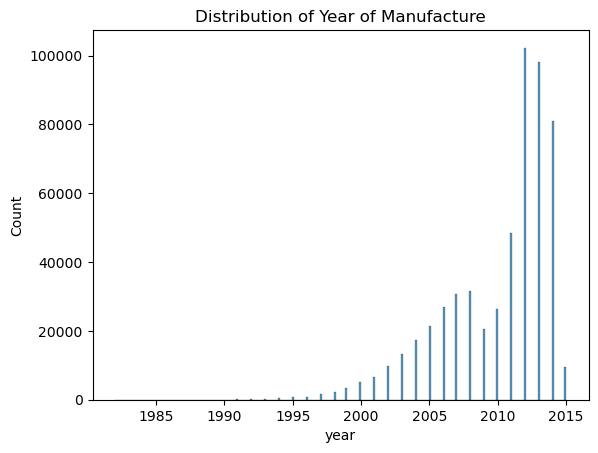

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# View histogram of 'year'
sns.histplot(car_prices["year"])
plt.title("Distribution of Year of Manufacture")
plt.show()

We see that a majority of the cars in the data were manufactured between 2011 and 2014. 

### The `make` column

Let's take a look at the makes present in the dataset: 

In [6]:
# Check makes
def display_unique(col): 
    col = col.unique()
    col = pd.Series(col)
    col = col.sort_values(ascending=True).tolist()
    print(col)

display_unique(car_prices["make"])

['Acura', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge', 'FIAT', 'Ferrari', 'Fisker', 'Ford', 'GMC', 'Geo', 'HUMMER', 'Honda', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Lotus', 'MINI', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Ram', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'acura', 'airstream', 'audi', 'bmw', 'buick', 'cadillac', 'chev truck', 'chevrolet', 'chrysler', 'dodge', 'dodge tk', 'dot', 'ford', 'ford tk', 'ford truck', 'gmc', 'gmc truck', 'honda', 'hyundai', 'hyundai tk', 'jeep', 'kia', 'land rover', 'landrover', 'lexus', 'lincoln', 'maserati', 'mazda', 'mazda tk', 'mercedes', 'mercedes-b', 'mercury', 'mitsubishi', 'nissan', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'smart', 'subaru', 'suzuki', 'toyota', 'vo

We can see lots of duplicates present with makes like Acura, Audi, and BMW. There are also some values like 'dodge tk' and 'chev truck'. We can fix most of these by capitalizing the first letter of the make. 

In [7]:
# Function to capitalize the first letter of each make
def capitalize_words(text):
    if (pd.notna(text)) and (text.islower()):
        return ' '.join(word.capitalize() for word in str(text).split())
    else:
        return text

# Check makes
car_prices["make"] = car_prices["make"].apply(capitalize_words)
display_unique(car_prices["make"])

['Acura', 'Airstream', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Bmw', 'Buick', 'Cadillac', 'Chev Truck', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge', 'Dodge Tk', 'Dot', 'FIAT', 'Ferrari', 'Fisker', 'Ford', 'Ford Tk', 'Ford Truck', 'GMC', 'Geo', 'Gmc', 'Gmc Truck', 'HUMMER', 'Honda', 'Hyundai', 'Hyundai Tk', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Landrover', 'Lexus', 'Lincoln', 'Lotus', 'MINI', 'Maserati', 'Mazda', 'Mazda Tk', 'Mercedes', 'Mercedes-Benz', 'Mercedes-b', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Ram', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Smart', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'Vw', nan]


Now, we can fix the rest of the typos by replacing them with the correct values. 

In [8]:
import numpy as np

# Replace typos with correct values
car_prices["make"] = np.where(car_prices["make"] == "Bmw", "BMW", car_prices["make"])
car_prices["make"] = np.where(car_prices["make"] == "Chev Truck", "Chevrolet", car_prices["make"])
car_prices["make"] = np.where(car_prices["make"] == "Dodge Tk", "Dodge", car_prices["make"])
car_prices["make"] = np.where(car_prices["make"] == "Ford Tk", "Ford", car_prices["make"])
car_prices["make"] = np.where(car_prices["make"] == "Ford Truck", "Ford", car_prices["make"])
car_prices["make"] = np.where(car_prices["make"] == "Gmc", "GMC", car_prices["make"])
car_prices["make"] = np.where(car_prices["make"] == "Gmc Truck", "GMC", car_prices["make"])
car_prices["make"] = np.where(car_prices["make"] == "Hyundai Tk", "Hyundai", car_prices["make"])
car_prices["make"] = np.where(car_prices["make"] == "Landrover", "Land Rover", car_prices["make"])
car_prices["make"] = np.where(car_prices["make"] == "Mazda Tk", "Mazda", car_prices["make"])
car_prices["make"] = np.where(car_prices["make"] == "Mercedes", "Mercedes-Benz", car_prices["make"])
car_prices["make"] = np.where(car_prices["make"] == "Mercedes-b", "Mercedes-Benz", car_prices["make"])
car_prices["make"] = np.where(car_prices["make"] == "Mercedes-benz", "Mercedes-Benz", car_prices["make"])
car_prices["make"] = np.where(car_prices["make"] == "Rolls-royce", "Rolls-Royce", car_prices["make"])
car_prices["make"] = np.where(car_prices["make"] == "Vw", "Volkswagen", car_prices["make"])

display_unique(car_prices["make"])

['Acura', 'Airstream', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge', 'Dot', 'FIAT', 'Ferrari', 'Fisker', 'Ford', 'GMC', 'Geo', 'HUMMER', 'Honda', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Lotus', 'MINI', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Ram', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Smart', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', nan]


In [9]:
# Show make popularities
make_popularities = car_prices["make"].value_counts().to_frame().reset_index()
make_popularities.transpose()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
make,Ford,Chevrolet,Nissan,Toyota,Dodge,Honda,Hyundai,BMW,Kia,Chrysler,...,Tesla,Ferrari,Geo,Rolls-Royce,Fisker,Lamborghini,Daewoo,Airstream,Dot,Lotus
count,94001,60588,54017,39966,30956,27351,21837,20793,18084,17485,...,23,19,19,17,9,4,3,1,1,1


Now, our make names are correct and grammatically polished. 

We still see that `nan` is a value present in the list of unique makes, so this indicates there are missing values that need to be dealt with. We can replace each missing value with a random selection from the top 10 most common makes. 

In [10]:
import random

# Replace missing values
print(car_prices["make"].isna().sum(), "missing values present in `make`.")
most_frequent_makes = ["Ford", "Chevrolet", "Nissan", "Toyota", "Dodge", "Honda", "Hyundai", "BMW", "Kia", "Chrysler"]
car_prices["make"] = np.where(car_prices["make"].isna(), random.choice(most_frequent_makes), car_prices["make"])
print("Filled missing values with a random value from", most_frequent_makes, ".")
print(car_prices["make"].isna().sum(), "missing values present in `make`.")

10301 missing values present in `make`.
Filled missing values with a random value from ['Ford', 'Chevrolet', 'Nissan', 'Toyota', 'Dodge', 'Honda', 'Hyundai', 'BMW', 'Kia', 'Chrysler'] .
0 missing values present in `make`.


The `make` column is now clean. Let's take a look at the relative popularities of the most common makes. 

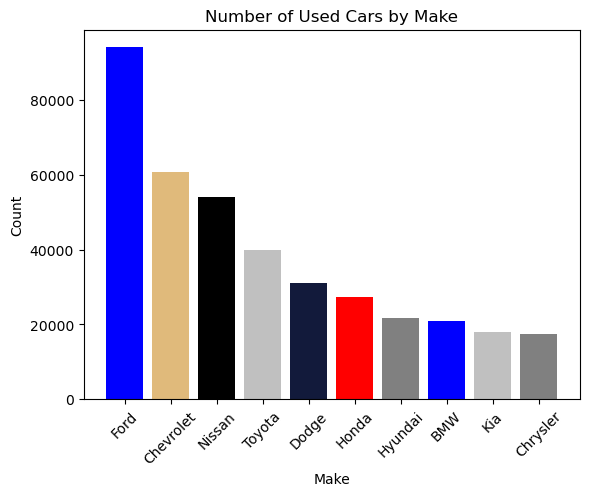

In [11]:
# View bar graph of most popular makes
top_10_makes = make_popularities.head(10)
colors = ["blue", "#e0ba7b", "black", "silver", "#121a3b", "red", "gray", "blue", "silver", "gray"]
bars = plt.bar(top_10_makes["make"], top_10_makes["count"], color=colors)
plt.xticks(rotation=45)
plt.title("Number of Used Cars by Make")
plt.xlabel("Make")
plt.ylabel("Count")
plt.show()

We see that Ford towers over every other brand in the number of used cars available. 

### The `model` column

In [12]:
# Show number of unique models
print("There are", len(car_prices["model"].unique()), "unique models in the data.")

There are 974 unique models in the data.


There are so many unique models in the data that it would take an unreasonable amount of time to make sure they are all perfect. Thus, we will simply replace missing values here. 

In [13]:
# Show missing count
print(car_prices["model"].isna().sum(), "missing values present in `model`.")

10399 missing values present in `model`.


In [14]:
# Show most popular models
most_popular_models = car_prices["model"].value_counts().to_frame().reset_index()
most_popular_models.transpose()

,0,1,2,3,4,5,6,7,8,9,...,963,964,965,966,967,968,969,970,971,972
model,Altima,F-150,Fusion,Camry,Escape,Focus,Accord,3 Series,Grand Caravan,Impala,...,328i,CTS-V Wagon,carrera,comm,versa,rrs,golf,g500,tahoe,458 Italia
count,19349,14479,12946,12545,11861,10394,9127,8204,7941,7923,...,1,1,1,1,1,1,1,1,1,1


It seems that the most popular models are all somewhat close in count, so we will replace missing values with a randomly-selected model from the top 10 most popular models. 

In [15]:
# Fill missing values 
most_popular_models = ["Altima", "F-150", "Fusion", "Camry", "Escape", "Focus", "Accord", "3 Series", "Grand Caravan", "Impala"]
car_prices["model"] = np.where(car_prices["model"].isna(), random.choice(most_popular_models), car_prices["model"])
print("Filled missing values with a random value from", most_popular_models, ".")
print(car_prices["model"].isna().sum(), "missing values present in `model`.")

Filled missing values with a random value from ['Altima', 'F-150', 'Fusion', 'Camry', 'Escape', 'Focus', 'Accord', '3 Series', 'Grand Caravan', 'Impala'] .
0 missing values present in `model`.


### The `trim` column

In [16]:
# Get count of unique trims
print("There are", len(car_prices["trim"].unique()), "unique trims in the data.")

There are 1976 unique trims in the data.


As with `model`, there are far too many unique trims for correcting each value to be practical. Thus, we will again focus on replacing missing values only. 

In [17]:
# Get count of missing values 
print(car_prices["trim"].isna().sum(), "missing values present in `trim`.")

10651 missing values present in `trim`.


In [18]:
# Get most popular trims
car_prices["trim"].value_counts().to_frame().transpose()

trim,Base,SE,LX,Limited,LT,XLT,LS,LE,GLS,S,...,5c 2.5l,Splash,cruiser touring,SX Premium,series m,xls,4x2 reg silverado,awd v8 limited,4x2 v6 limited,Power Wagon
count,55817,43648,20757,18356,16915,16741,13427,12903,12331,11883,...,1,1,1,1,1,1,1,1,1,1


We will again fill missing `trim` values with one of the top 10 most common trims. 

In [19]:
# Fill missing values
most_popular_trims = ["Base", "SE", "LX", "Limited", "LT", "XLT", "LS", "LE", "GLS", "S"]
car_prices["trim"] = np.where(car_prices["trim"].isna(), random.choice(most_popular_trims), car_prices["trim"])
print("Filled missing values.")
print(car_prices["trim"].isna().sum(), "missing values present in `trim`.")

Filled missing values.
0 missing values present in `trim`.


### The `body` column

In [20]:
# Show most popular body types
car_prices["body"].value_counts().to_frame().transpose()

body,Sedan,SUV,sedan,suv,Hatchback,Minivan,Coupe,Wagon,Crew Cab,Convertible,...,Cab Plus,q60 coupe,xtracab,g37 convertible,q60 convertible,g37 coupe,cab plus 4,CTS-V Wagon,Ram Van,cts wagon
count,199437,119292,41906,24552,21380,21363,14602,13630,13280,8652,...,4,4,4,4,4,1,1,1,1,1


In [21]:
# Show all body types
display_unique(car_prices["body"])

['Access Cab', 'Beetle Convertible', 'CTS Coupe', 'CTS Wagon', 'CTS-V Coupe', 'CTS-V Wagon', 'Cab Plus', 'Cab Plus 4', 'Club Cab', 'Convertible', 'Coupe', 'Crew Cab', 'CrewMax Cab', 'Double Cab', 'E-Series Van', 'Elantra Coupe', 'Extended Cab', 'G Convertible', 'G Coupe', 'G Sedan', 'G37 Convertible', 'G37 Coupe', 'Genesis Coupe', 'GranTurismo Convertible', 'Hatchback', 'King Cab', 'Koup', 'Mega Cab', 'Minivan', 'Promaster Cargo Van', 'Q60 Convertible', 'Q60 Coupe', 'Quad Cab', 'Ram Van', 'Regular Cab', 'SUV', 'Sedan', 'SuperCab', 'SuperCrew', 'TSX Sport Wagon', 'Transit Van', 'Van', 'Wagon', 'Xtracab', 'access cab', 'beetle convertible', 'cab plus 4', 'club cab', 'convertible', 'coupe', 'crew cab', 'crewmax cab', 'cts coupe', 'cts wagon', 'cts-v coupe', 'double cab', 'e-series van', 'elantra coupe', 'extended cab', 'g convertible', 'g coupe', 'g sedan', 'g37 convertible', 'g37 coupe', 'genesis coupe', 'granturismo convertible', 'hatchback', 'king cab', 'koup', 'mega cab', 'minivan', '

We see that some of the most popular vehicle bodies, such as sedans, SUVs, hatchbacks, minivans and coupes, have duplicates present. We will repeat the same process that was just applied to the `make` column. 

In [22]:
# Capitalize all body type names
car_prices["body"] = car_prices["body"].apply(capitalize_words)
display_unique(car_prices["body"])

['Access Cab', 'Beetle Convertible', 'CTS Coupe', 'CTS Wagon', 'CTS-V Coupe', 'CTS-V Wagon', 'Cab Plus', 'Cab Plus 4', 'Club Cab', 'Convertible', 'Coupe', 'Crew Cab', 'CrewMax Cab', 'Crewmax Cab', 'Cts Coupe', 'Cts Wagon', 'Cts-v Coupe', 'Double Cab', 'E-Series Van', 'E-series Van', 'Elantra Coupe', 'Extended Cab', 'G Convertible', 'G Coupe', 'G Sedan', 'G37 Convertible', 'G37 Coupe', 'Genesis Coupe', 'GranTurismo Convertible', 'Granturismo Convertible', 'Hatchback', 'King Cab', 'Koup', 'Mega Cab', 'Minivan', 'Promaster Cargo Van', 'Q60 Convertible', 'Q60 Coupe', 'Quad Cab', 'Ram Van', 'Regular Cab', 'Regular-cab', 'SUV', 'Sedan', 'SuperCab', 'SuperCrew', 'Supercab', 'Supercrew', 'Suv', 'TSX Sport Wagon', 'Transit Van', 'Tsx Sport Wagon', 'Van', 'Wagon', 'Xtracab', nan]


In [23]:
# Replace SUV typos
car_prices["body"] = np.where(car_prices["body"] == "Suv", "SUV", car_prices["body"])

There are still a few duplicates, but these body types are very rare in the dataset and thus will not have much of an impact on the analysis. The most important types to fix were the ones mentioned above. 

Next, we will handle missing `body` values:

In [24]:
# Handle missing `body` values
print(car_prices["body"].isna().sum(), "missing values present in `body`.")
print(len(car_prices["body"]), "values total.")

13195 missing values present in `body`.
558811 values total.


In [25]:
# Check percentage of cars that are either sedans or SUVs
sedan_suv_combined_count = len(car_prices[(car_prices['body'] == "Sedan") | (car_prices['body'] == "SUV")])
sedan_suv_percentage = (sedan_suv_combined_count / len(car_prices)) * 100
print(round(sedan_suv_percentage, 2), "percent of vehicles in the data are either sedans or SUVs.")

68.93 percent of vehicles in the data are either sedans or SUVs.


Because sedans and SUVs account for the majority of cars in the data, we will replace all missing `body` values with one of these two, chosen randomly. 

In [26]:
# Replace missing values
bodies = ["Sedan", "SUV"]
car_prices["body"] = np.where(car_prices["body"].isna(), random.choice(bodies), car_prices["body"])
print("Filled missing values with either 'Sedan' or 'SUV.'")
print(car_prices["body"].isna().sum(), "missing values present in `body`.")

Filled missing values with either 'Sedan' or 'SUV.'
0 missing values present in `body`.


### The `transmission` column

Next, we will take a look at `transmission` to see if there are any potential problems. 

In [27]:
# Check values present
print("Transmission types:", car_prices["transmission"].unique().tolist())

# Show missing `transmission` values
print(car_prices["transmission"].isna().sum(), "missing values present in `transmission`.")

Transmission types: ['automatic', nan, 'manual']
65353 missing values present in `transmission`.


In [28]:
# Check counts of each type of transmission
car_prices["transmission"].value_counts().to_frame().transpose()

transmission,automatic,manual
count,475914,17544


We can fill missing `transmission` values with automatic, since that is by far the most common transmission type. 

In [29]:
# Fill missing `transmission` values
car_prices["transmission"] = np.where(car_prices["transmission"].isna(), "automatic", car_prices["transmission"])
print("Filled missing values with 'automatic'.")
print(car_prices["transmission"].isna().sum(), "missing values present in `transmission`.")

Filled missing values with 'automatic'.
0 missing values present in `transmission`.


With that, the `transmission` column is now clean. 

### The `state` column

In [30]:
len(car_prices["state"].unique())

38

We have cars from 38 different states in this dataset. 

In [31]:
# Capitalize state shortenings
car_prices["state"] = car_prices["state"].str.upper()
car_prices["state"].value_counts().to_frame().reset_index().sort_values(by="state", ascending=True).transpose()

,33,37,17,1,18,0,4,31,6,22,...,2,26,30,23,9,3,29,13,19,15
state,AB,AL,AZ,CA,CO,FL,GA,HI,IL,IN,...,PA,PR,QC,SC,TN,TX,UT,VA,WA,WI
count,928,26,8741,73148,7775,82945,34750,1237,23486,4325,...,53907,2725,1245,4251,20895,45913,1836,12027,7416,9851


Let's see if there are any missing values. 

In [32]:
# Check for missing values
car_prices["state"].isna().sum()

0

Everything looks fine for the `state` column. Let's see which 10 states see the most used car sales. 

In [33]:
# Find top 10 states
top_10_states = car_prices["state"].value_counts().to_frame().head(10).reset_index()
top_10_states.transpose()

,0,1,2,3,4,5,6,7,8,9
state,FL,CA,PA,TX,GA,NJ,IL,NC,OH,TN
count,82945,73148,53907,45913,34750,27784,23486,21845,21575,20895


Unsurprisingly, states with large populations like Florida, California and Texas sell huge numbers of used cars. 

### The `condition` column

In [34]:
# View descriptive statistics
print("Total entries in the dataset:", len(car_prices))
car_prices["condition"].describe().to_frame().transpose()

Total entries in the dataset: 558811


,count,mean,std,min,25%,50%,75%,max
condition,547017.0,3.424512,0.949439,1.0,2.7,3.6,4.2,5.0


We see that condition goes from 1 to 5, with a sensible mean of ~3.42. However, we see that there are only about 547,000 condition values, meaning about 11,000 vehicles are missing a condition value. We can simply fill these in with the mode. 

In [35]:
# Fill in missing values with the mode condition
car_prices["condition"] = np.where(car_prices["condition"].isna(), car_prices["condition"].mode(), car_prices["condition"])
print("Replaced missing values with the mode condition.")
print(car_prices["condition"].isna().sum(), "missing values present in `condition`.")

Replaced missing values with the mode condition.
0 missing values present in `condition`.


Let's view the distribution of car conditions. 

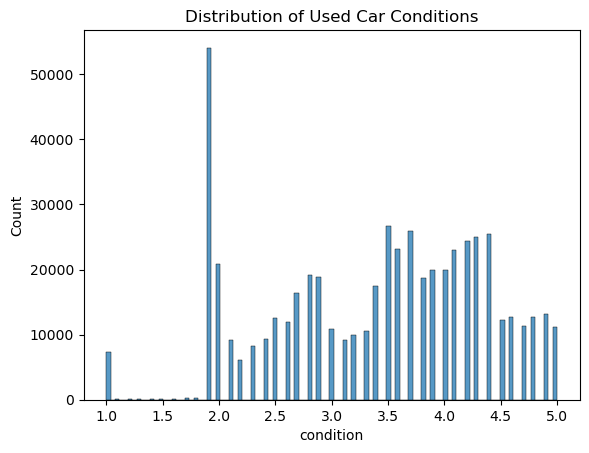

In [36]:
# Check condition distribution
sns.histplot(car_prices["condition"])
plt.title("Distribution of Used Car Conditions")
plt.show()

We see a large clustering of used cars in the 3.5-4.3 range, with a massive spike around 2.0. This suggests that a large proportion of people selling their cars were doing so because the cars weren't in good shape and they wanted to upgrade. 

### The `color` column

In [37]:
display_unique(car_prices["color"])

['beige', 'black', 'blue', 'brown', 'burgundy', 'charcoal', 'gold', 'gray', 'green', 'lime', 'off-white', 'orange', 'pink', 'purple', 'red', 'silver', 'turquoise', 'white', 'yellow', '—', nan]


The values in this column look mostly fine, though we will need to deal with `—` and `nan` values.

In [38]:
# Show number of missing `color` values
num_missing_colors = len(car_prices[(car_prices["color"].isnull()) | (car_prices["color"] == "—")])
print(num_missing_colors, "missing values present in `color`.")

25434 missing values present in `color`.


We can replace both of these types of incorrect values with a random value from a subset of the most popular colors. But what are those? 

In [39]:
# Find most common colors
car_prices["color"].value_counts().to_frame().transpose()

color,black,white,silver,gray,blue,red,—,green,gold,beige,burgundy,brown,orange,purple,off-white,yellow,charcoal,turquoise,pink,lime
count,110970,106673,83389,82857,51139,43569,24685,11382,11342,9222,8972,6717,2078,1561,1449,1285,479,236,42,15


It appears that black, white, silver, gray, blue, and red are by far the most common car colors, so we can replace missing values with one of those. 

In [40]:
# Replace missing values with a random popular color
popular_colors = ["black", "white", "silver", "gray", "blue", "red"]
is_missing_color = (car_prices["color"].isna()) | (car_prices["color"] == "—")
car_prices["color"] = np.where(is_missing_color, random.choice(popular_colors), car_prices["color"])
print("Filled missing values with a random color from", popular_colors, ".")
num_missing_colors = len(car_prices[(car_prices["color"].isnull()) | (car_prices["color"] == "—")])
print(num_missing_colors, "missing values present in `color`.")

Filled missing values with a random color from ['black', 'white', 'silver', 'gray', 'blue', 'red'] .
0 missing values present in `color`.


### The `odometer` column

In [41]:
# View descriptive statistics
print("Mode:", car_prices["odometer"].mode())
car_prices["odometer"].describe().to_frame().transpose()

Mode: 0    1.0
Name: odometer, dtype: float64


,count,mean,std,min,25%,50%,75%,max
odometer,558717.0,68323.195797,53397.752933,1.0,28374.0,52256.0,99112.0,999999.0


We will replace missing values with the mean, since using an odometer reading of 1 mile to replace missing values does not seem accurate.  

In [42]:
# Replace missing values
print("Missing odometer values:", car_prices["odometer"].isna().sum())
car_prices["odometer"] = np.where(car_prices["odometer"].isna(), car_prices["odometer"].mean(), car_prices["odometer"])
print("Replaced missing values with the mean odometer reading.")
print(car_prices["odometer"].isna().sum(), "missing values present in `odometer`.")

Missing odometer values: 94
Replaced missing values with the mean odometer reading.
0 missing values present in `odometer`.


Because `odometer` is a continuous variable with a very large range of possible values, we should check for outliers and deal with them. However, we should look at the distribution of values to determine whether these will actually have a considerable impact on the analysis. 

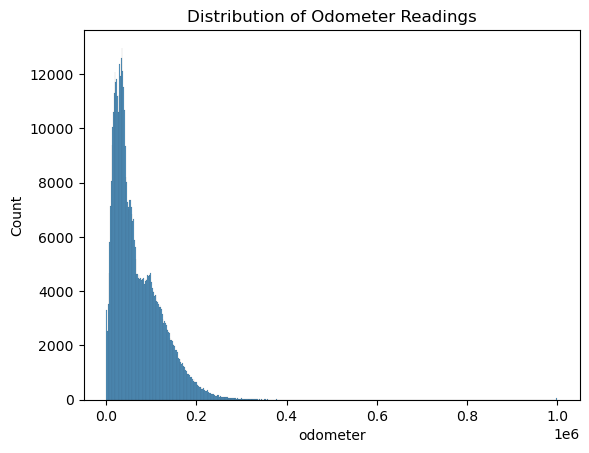

In [43]:
# View distribution of odometer reading
sns.histplot(car_prices["odometer"])
plt.title("Distribution of Odometer Readings")
plt.show()

We see that the overwhelming majority of values fall within the 0 to 200,000 range, which is sensible. The outliers are very rare, and thus will have a negligible impact on the analysis. 

### The `interior` column

In [44]:
display_unique(car_prices["interior"])

['beige', 'black', 'blue', 'brown', 'burgundy', 'gold', 'gray', 'green', 'off-white', 'orange', 'purple', 'red', 'silver', 'tan', 'white', 'yellow', '—', nan]


The names of the interior colors look fine, but the `—` and `nan` values should be dealt with. Again, we can replace these with a random selection from the most common interior colors. 

In [45]:
car_prices["interior"].value_counts().to_frame().transpose()

interior,black,gray,beige,tan,—,brown,red,blue,silver,off-white,purple,gold,white,green,burgundy,orange,yellow
count,244325,178578,59758,44093,17076,8640,1359,1138,1099,480,339,324,252,245,191,145,20


In [46]:
# Replace missing interior colors with the most common values
print(car_prices["interior"].isna().sum(), "missing values present in `interior`.")
most_common_interior_colors = ["black", "gray", "beige", "tan"]
is_missing_interior_color = (car_prices["interior"].isna()) | (car_prices["interior"] == "—")
car_prices["interior"] = np.where(is_missing_interior_color, random.choice(most_common_interior_colors), car_prices["interior"])
print("Filled missing values with a random color from", most_common_interior_colors, ".")
print(car_prices["interior"].isna().sum(), "missing values present in `interior`.")

749 missing values present in `interior`.
Filled missing values with a random color from ['black', 'gray', 'beige', 'tan'] .
0 missing values present in `interior`.


Let's check the list of interior colors in the dataset now. It shouldn't include `—` or `nan` anymore. 

In [47]:
display_unique(car_prices["interior"])

['beige', 'black', 'blue', 'brown', 'burgundy', 'gold', 'gray', 'green', 'off-white', 'orange', 'purple', 'red', 'silver', 'tan', 'white', 'yellow']


With this done, the `interior` column is now clean. 

### The `seller` column

In [48]:
print("There are", len(car_prices["seller"].unique()), "unique sellers in the data.")

There are 14264 unique sellers in the data.


It would take too long to correct all incorrect `seller` values, so we will simply replace missing values. 

In [49]:
car_prices["seller"].isna().sum()

0

There are no missing values, so nothing needs to be done. 

### The `mmr` column

In [50]:
# Get descriptive statistics about 'mmr'
car_prices["mmr"].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
mmr,558811.0,13769.324646,9679.874607,25.0,7100.0,12250.0,18300.0,182000.0


These values seem reasonable. Let's check for missing values: 

In [51]:
# Check for missing values
car_prices["mmr"].isna().sum()

0

No missing values, so we are all good here. 

### The `sellingprice` column

In [52]:
# Get descriptive statistics about 'sellingprice'
car_prices["sellingprice"].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
sellingprice,558811.0,13611.262461,9749.656919,1.0,6900.0,12100.0,18200.0,230000.0


The descriptive statistics for `sellingprice` are very similar to those of `mmr`, given that the selling price of a vehicle is closely related to the MMR (a value that helps dealers decide how much to offer a customer for a trade-in vehicle). 

There are no missing values, since the count is 558,811, the same as `mmr` which had no missing values. 

### The `saledate` column

In [53]:
# Check for missing values
car_prices["saledate"].isna().sum()

0

No missing values are present in `saledate`, so this column is fine. 

## Task 4
Identify potential research questions or hypotheses that could be addressed through this analysis, and conduct correlation analysis to explore the relationships between variables. Use appropriate statistical techniques to measure the strength and direction of the relationship.
    
<table>
    <tr>
        <td style="text-align: center"><b><h3>Research question</h3></b></td>
        <td style="text-align: center"><b><h3>Tools to apply</h3></b></td>
    </tr>
    <tr>
        <td style="text-align: center">What is the relationship between the number of miles a car has been driven and its resale value?</td>
        <td style="text-align: center">Scatterplot, correlation coefficient analysis</td>
    </tr>
    <tr>
        <td style="text-align: center">What is the relationship between the year of a vehicle and its resale value?</td>
        <td style="text-align: center">Bar chart, one-way ANOVA test</td>
    </tr>
    <tr>
        <td style="text-align: center">Does a vehicle's transmission type significantly impact its resale value?</td>
        <td style="text-align: center">Bar chart, two-sample t test</td>
    </tr>
    <tr>
        <td style="text-align: center">Does the state/province in which a car is sold affect its resale value?</td>
        <td style="text-align: center">Bar chart, one-way ANOVA test</td>
    </tr>
    <tr>
        <td style="text-align: center">Do certain colors of cars net a higher resale value than others?</td>
        <td style="text-align: center">Bar chart, one-way ANOVA test</td>
    </tr>
    <tr>
        <td style="text-align: center">Which numeric factor (year, condition, or odometer) has the largest effect on resale value?</td>
        <td style="text-align: center">Correlation matrix/heatmap</td>
    </table>

### What is the relationship between the number of miles a car has been driven and its resale value? 
We will first check out a scatterplot of `odometer` vs. `sellingprice`. Because there are over 558,000 entries in the data and they would never all fit on one scatterplot, we will take a random sample of the data. 

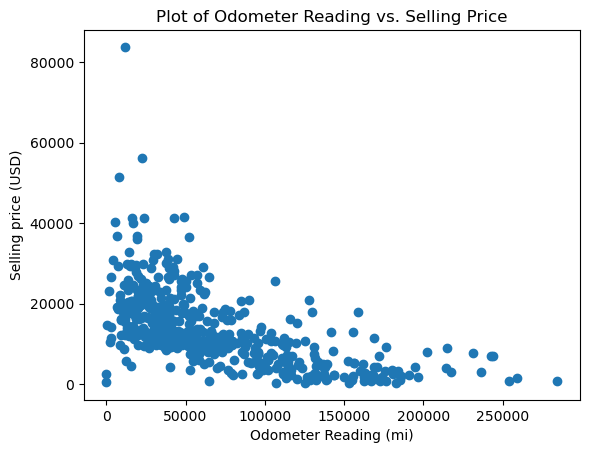

Correlation coefficient: -0.5908358102693942


In [54]:
# Take random sample of the data
sample = car_prices.sample(500, random_state=42)

# Plot data and get correlation coefficient
plt.scatter(sample["odometer"], sample["sellingprice"])
plt.title("Plot of Odometer Reading vs. Selling Price")
plt.xlabel("Odometer Reading (mi)")
plt.ylabel("Selling price (USD)")
plt.show()
print("Correlation coefficient:", sample["odometer"].corr(sample["sellingprice"]))

We find a correlation coefficient of ~-0.59, which means that a car's selling price decreases by about <span>&dollar;0.59</span> for every additional mile driven, on average. 

### What is the relationship between the year of a vehicle and its resale value?
Here, we want to run a one-factor ANOVA test to determine if a significant difference exists between the mean resale values of cars manufactured in different years. 

* $H_0$: No significant difference exists between the mean resale values of cars manufactured in different years. 
* $H_a$: A significant difference exists. 
* $\alpha$ = 0.05. 

In [55]:
from scipy.stats import f_oneway

# Group by year
mean_resale_value_by_year = [group["sellingprice"] for year, group in car_prices.groupby("year")]

# Perform one-way ANOVA test
f_stat, p_value = f_oneway(*mean_resale_value_by_year)
print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 9754.526871791879
P-value: 0.0


We get a P-value that is much less than $\alpha$, so we reject $H_0$ and conclude that the mean resale values of cars from different years are significantly different. Let's see what that difference looks like. 

In [56]:
# Find mean selling price by year
mean_resale_value_by_year = car_prices.groupby("year")["sellingprice"].mean().to_frame().reset_index()
mean_resale_value_by_year["sellingprice"] = round(mean_resale_value_by_year["sellingprice"], 2)
mean_resale_value_by_year.transpose()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
year,1982.0,1983.0,1984.0,1985.0,1986.00,1987.0,1988.00,1989.0,1990.00,1991.00,...,2006.0,2007.00,2008.00,2009.00,2010.00,2011.00,2012.0,2013.0,2014.00,2015.00
sellingprice,12750.0,5250.0,2160.0,3520.0,2538.64,1512.5,3168.18,1620.0,1435.71,943.66,...,6190.2,8021.97,9508.05,10462.31,12412.45,15851.68,16653.6,17476.0,20089.87,25966.01


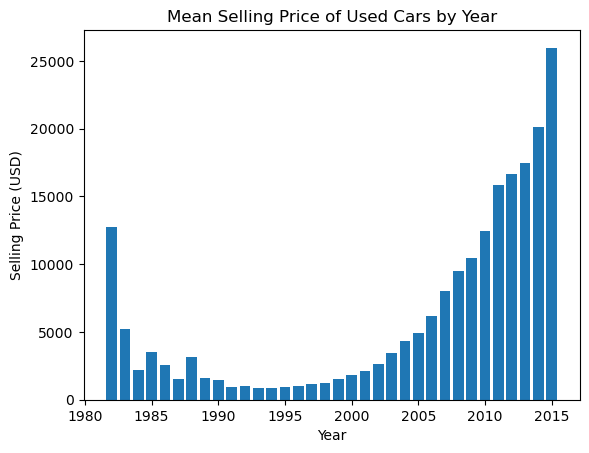

In [57]:
# Graph mean selling prices by year
bars = plt.bar(mean_resale_value_by_year["year"], mean_resale_value_by_year["sellingprice"])
plt.title("Mean Selling Price of Used Cars by Year")
plt.xlabel("Year")
plt.ylabel("Selling Price (USD)")
plt.show()

We see an interesting parabolic shape to the distribution. This is likely because cars from the 1980s are considered classics, cars from 2005 and onwards are modern enough to be worth a decent amount, and everything in the middle is stuck in the no-man's-land of being old but not quite classic, netting them far lower resale values. 

### Does a vehicle's transmission type significantly impact its resale value?
To answer this question, we will first run a two-sample t test to see if the mean resale values of vehicles with automatic and manual transmissions are significantly different. 

* $H_0$: There is no significant difference between the mean resale values of automatics and manuals. 
* $H_a$: There is a significant difference. 
* $\alpha$ = 0.05. 

In [58]:
from scipy.stats import ttest_ind, levene

# Group data by transmission type
automatics = car_prices[car_prices["transmission"] == "automatic"]["sellingprice"]
manuals = car_prices[car_prices["transmission"] == "manual"]["sellingprice"]

# Check for equal variances
stat, p_value_levene = levene(automatics, manuals)
print("Levene stat:", stat)
print("P-value:", p_value_levene)

Levene stat: 11.437424042417007
P-value: 0.0007198444027435758


We conclude from Levene's test that the two groups have unequal variances, so we will account for this when invoking the `ttest_ind` function to perform the test. 

In [59]:
# Run two-sample t test
t_stat, p_value = ttest_ind(automatics, manuals, equal_var=False)
print("T stat:", t_stat)
print("P-value:", p_value)

T stat: 31.497291387886513
P-value: 3.4897392940469945e-212


We get a P-value significantly less than $\alpha$, so we reject $H_0$ and conclude that the transmission type of a used vehicle has a significant impact on its resale value. How much of an impact does it have, though? 

In [60]:
# Find mean resale values of automatics and manuals
print("Mean automatic price:$", round(automatics.mean(), 2))
print("Mean manual price:$", round(manuals.mean(), 2))

Mean automatic price:$ 13689.05
Mean manual price:$ 11211.45


There is a ~<span>&dollar;2,400</span> difference between the price of an average automatic and an average manual. 

### Does the state/province in which a car is sold affect its resale value?
We will use a one-way ANOVA test to answer this question. 

* $H_0$: There is no significant difference between the mean resale values in each state/province. 
* $H_a$: There is a significant difference. 
* $\alpha$ = 0.05. 

In [61]:
# Group by year
mean_resale_value_by_state = [group["sellingprice"] for year, group in car_prices.groupby("state")]

# Perform one-way ANOVA test
f_stat, p_value = f_oneway(*mean_resale_value_by_state)
print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 807.7576343816219
P-value: 0.0


The P-value for this test is less than $\alpha$, so we reject $H_0$ and conclude that the state/province a car is sold in has a significant impact on its resale value. 

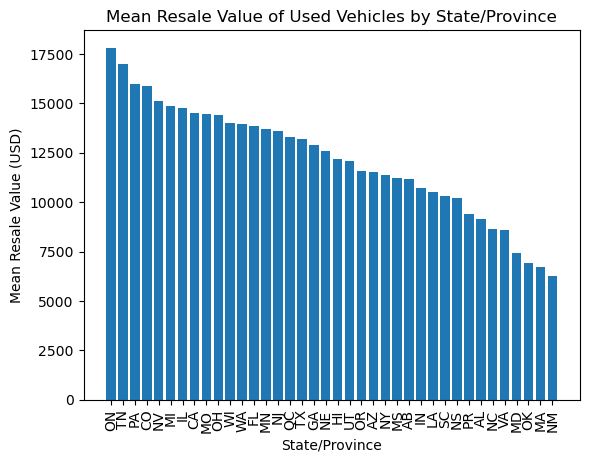

In [62]:
# Find the mean resale value by state
mean_resale_value_by_state = car_prices.groupby("state")["sellingprice"].mean().to_frame().reset_index()
mean_resale_value_by_state = mean_resale_value_by_state.sort_values(by="sellingprice", ascending=False)

# Show resale values by state
bars = plt.bar(mean_resale_value_by_state["state"], mean_resale_value_by_state["sellingprice"])
plt.title("Mean Resale Value of Used Vehicles by State/Province")
plt.xticks(rotation=90)
plt.xlabel("State/Province")
plt.ylabel("Mean Resale Value (USD)")
plt.show()

We see that the average used car in Ontario goes for over double what it would in several states and provinces, confirming that location has a big impact on a vehicle's resale value. 

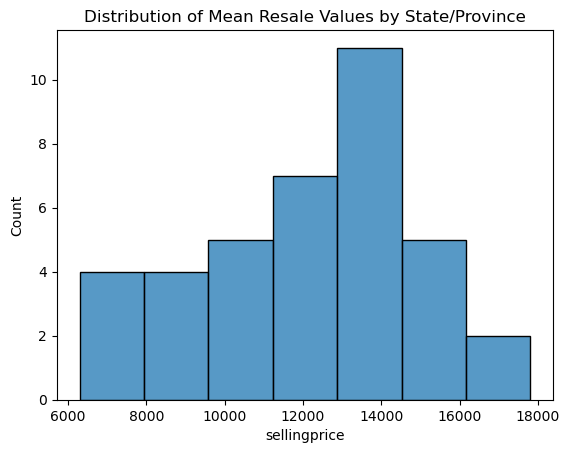

In [63]:
# Show distribution of mean resale values by state
sns.histplot(mean_resale_value_by_state["sellingprice"])
plt.title("Distribution of Mean Resale Values by State/Province")
plt.show()

Most states and provinces have an average resale value of <span>&dollar;12,000 to</span> <span>&dollar;14,000.</span>

### Do certain colors of cars net a higher resale value than others?
We can use a one-way ANOVA test to answer this. 

* $H_0$: There is no significant difference in mean resale values between cars of different colors.
* $H_a$: A significant difference exists. 
* $\alpha$ = 0.05. 

In [64]:
# Group by color
mean_resale_value_by_color = [group["sellingprice"] for year, group in car_prices.groupby("color")]

# Perform one-way ANOVA test
f_stat, p_value = f_oneway(*mean_resale_value_by_color)
print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 1029.9740399659083
P-value: 0.0


Our p-value is significantly less than $\alpha$, so we reject $H_0$ and conclude that mean resale values differ significantly between cars of different colors. 

In [65]:
# Find mean resale value of cars by color
mean_resale_value_by_color = car_prices.groupby("color")["sellingprice"].mean().to_frame().reset_index()
mean_resale_value_by_color["sellingprice"] = round(mean_resale_value_by_color["sellingprice"], 2)
mean_resale_value_by_color = mean_resale_value_by_color.sort_values(by="sellingprice", ascending=False)
mean_resale_value_by_color.transpose()

,5,1,3,10,17,7,9,15,11,14,18,13,4,12,2,0,16,6,8
color,charcoal,black,brown,off-white,white,gray,lime,silver,orange,red,yellow,purple,burgundy,pink,blue,beige,turquoise,gold,green
sellingprice,16247.5,15508.97,15352.81,15230.23,14740.55,13951.27,13256.67,13223.05,12787.11,12688.91,12652.2,11969.68,11903.0,11746.43,11440.61,9431.17,8374.48,8324.71,8301.81


We see that charcoal and black are the most valuable colors, suggesting car dealerships highly value dark color schemes, probably because consumer demand for them is higher. 

### Which numeric factor (year, condition, or odometer) has the largest effect on resale value?
We can conduct correlation analysis using a correlation matrix to determine which factor is most important in determining a car's resale value. 

In [66]:
# Get subset of dataframe with only needed columns
car_prices_numeric = car_prices[["year", "condition", "odometer", "sellingprice"]]
car_prices_numeric = car_prices_numeric.sample(1000, random_state=42).reset_index(drop=True)
car_prices_numeric.head()

,year,condition,odometer,sellingprice
0,2014,4.0,14571.0,32750
1,2013,4.2,39300.0,26200
2,2014,3.4,30275.0,13600
3,2011,2.8,31727.0,32200
4,2010,4.3,32880.0,11500


In [67]:
# Generate correlation matrix
car_prices_numeric.corr()

,year,condition,odometer,sellingprice
year,1.000000,0.557633,-0.777718,0.578604
condition,0.557633,1.000000,-0.543388,0.560886
odometer,-0.777718,-0.543388,1.000000,-0.589520
sellingprice,0.578604,0.560886,-0.589520,1.000000


We see that `odometer` has the largest absolute correlation coefficient with `sellingprice`, so we conclude that `odometer` is slightly more important than `year` or `condition` for determining the selling price of a used vehicle, though it is close. 

## Task 5
Fit a regression model to investigate the relationship between two or more variables in the dataset. Use appropriate techniques to validate the assumptions of the regression model, such as normality, linearity, and homoscedasticity.

<i>We will be exploring the relationship between</i>`year`, `condition`, `odometer` <i>and</i> `sellingprice` <i>through a regression model.</i>

In [68]:
import statsmodels.api as sm

# Define independent variables and dependent variable
x_model = car_prices_numeric.drop("sellingprice", axis=1)
y_model = car_prices_numeric["sellingprice"]

# Add constant for intercept
x_model = sm.add_constant(x_model)

# Create the linear model
model = sm.OLS(y_model, x_model).fit()

# Predict charges
predicted_sellingprice = model.predict(x_model)
car_prices_numeric['predicted_sellingprice'] = predicted_sellingprice

# Calculate residuals
car_prices_numeric["residual"] = car_prices_numeric["sellingprice"] - car_prices_numeric["predicted_sellingprice"]

# Create backup of dataframe from first regression run
car_prices_numeric_backup1 = car_prices_numeric.copy()

# Summarize model results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           sellingprice   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     265.6
Date:                Tue, 23 Jan 2024   Prob (F-statistic):          1.22e-126
Time:                        12:22:01   Log-Likelihood:                -10333.
No. Observations:                1000   AIC:                         2.067e+04
Df Residuals:                     996   BIC:                         2.069e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.012e+06   1.98e+05     -5.124      0.0

Let's check the predictions that were generated earlier: 

In [69]:
# Create backup of first regression run results
car_prices_numeric_backup2 = car_prices_numeric.copy()

car_prices_numeric.head()

,year,condition,odometer,sellingprice,predicted_sellingprice,residual
0,2014,4.0,14571.0,32750,20389.426086,12360.573914
1,2013,4.2,39300.0,26200,19307.474907,6892.525093
2,2014,3.4,30275.0,13600,17732.006620,-4132.006620
3,2011,2.8,31727.0,32200,14249.285181,17950.714819
4,2010,4.3,32880.0,11500,18415.570864,-6915.570864


And check a residual plot: 

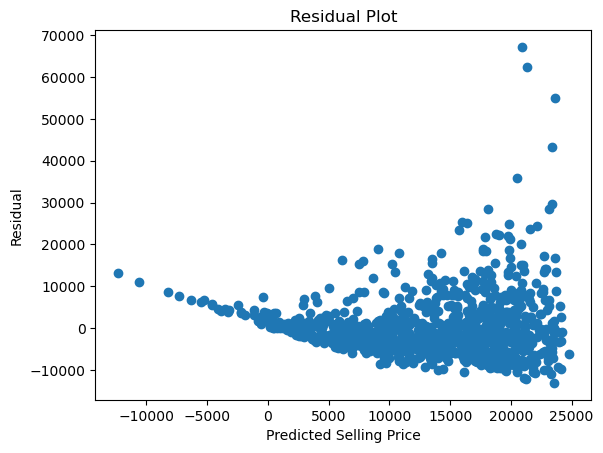

In [70]:
# Generate residual plot
plt.scatter(car_prices_numeric["predicted_sellingprice"], car_prices_numeric["residual"])
plt.title("Residual Plot")
plt.xlabel("Predicted Selling Price")
plt.ylabel("Residual")
plt.show()

We see somewhat of a cone shape in the residual plot, suggesting heteroscedasticity. Let's try applying a square root transformation to the dependent variable and see what we get. 

In [71]:
car_prices_numeric.head(1)

,year,condition,odometer,sellingprice,predicted_sellingprice,residual
0,2014,4.0,14571.0,32750,20389.426086,12360.573914


In [72]:
# Drop unnnecessary columns
car_prices_numeric = car_prices_numeric.drop(columns={"predicted_sellingprice", "residual"})

# Apply sqrt transformation to 'sellingprice' 
car_prices_numeric["sellingprice_sqrt"] = np.sqrt(car_prices_numeric["sellingprice"])

# Recreate model
x_model = car_prices_numeric.drop("sellingprice", axis=1)
y_model = car_prices_numeric["sellingprice"]
x_model = sm.add_constant(x_model)
model = sm.OLS(y_model, x_model).fit()
predicted_sellingprice_log = model.predict(x_model)
car_prices_numeric['predicted_sellingprice_sqrt'] = predicted_sellingprice_log

# Calculate residuals
car_prices_numeric["residual"] = car_prices_numeric["sellingprice"] - car_prices_numeric["predicted_sellingprice_sqrt"]

# Show new predictions
car_prices_numeric.head()

,year,condition,odometer,sellingprice,sellingprice_sqrt,predicted_sellingprice_sqrt,residual
0,2014,4.0,14571.0,32750,180.969611,30837.091740,1912.908260
1,2013,4.2,39300.0,26200,161.864141,26170.279495,29.720505
2,2014,3.4,30275.0,13600,116.619038,13694.866072,-94.866072
3,2011,2.8,31727.0,32200,179.443584,32372.093435,-172.093435
4,2010,4.3,32880.0,11500,107.238053,12361.106557,-861.106557


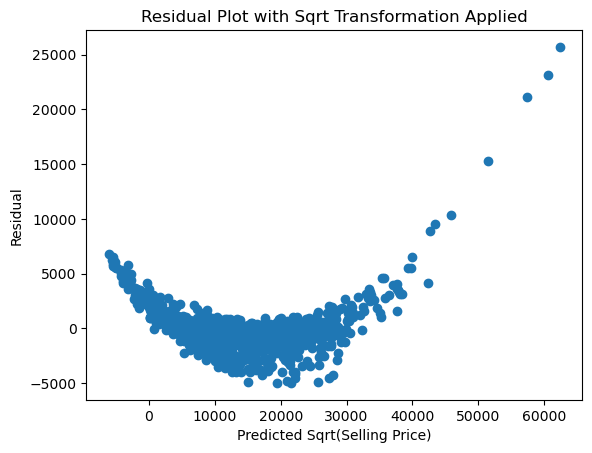

In [73]:
# Check new residual plot
plt.scatter(car_prices_numeric["predicted_sellingprice_sqrt"], car_prices_numeric["residual"])
plt.title("Residual Plot with Sqrt Transformation Applied")
plt.xlabel("Predicted Sqrt(Selling Price)")
plt.ylabel("Residual")
plt.show()

<Axes: xlabel='residual', ylabel='Count'>

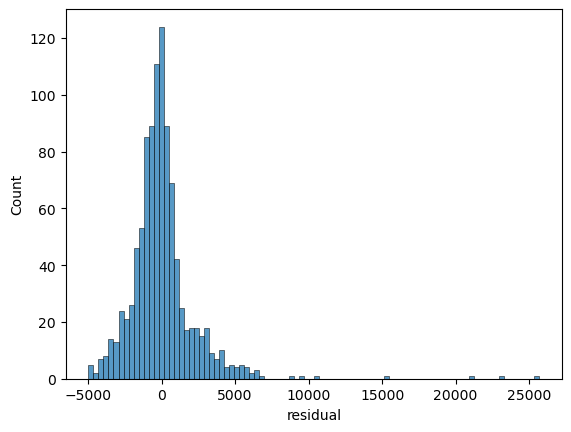

In [74]:
# Show histogram of residuals
sns.histplot(car_prices_numeric["residual"])

Even though the scatterplots both before and after the square root transformation were applied suggest a clear pattern in the residuals, we can see here that the residuals are normally distributed. Thus, the normality assumption is not violated. 

The most obvious alternative explanation is that the relationship between `year`, `condition` and `odometer` and `sellingprice` is nonlinear. Thus, linear regression is a poor representation of the data.